In [12]:
import numpy 
import matplotlib.pyplot as plt 

### Gambling Problem

A gambler has the opportunity to make bets on
the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many
dollars as he has staked on that flip; if it is tails, he loses his stake. The game ends
when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, in integer
numbers of dollars.

In [13]:
class Gambler: 
    def __init__(self, name, tgt_amount = 100):
        self.name   = name 
        self.tgt    = tgt_amount 
        self.V      = numpy.zeros(tgt_amount + 1) 
        self.policy = numpy.zeros(tgt_amount) 
    
    # Now we will implement the value iteration method to find the best gamble 
    def train(self, discount_factor = 1, p_h = 0.25):
        # Rewards for training 
        reward = numpy.zeros(self.tgt + 1)
        reward[self.tgt] = 1 

        # Now implement value iteration 
        print("Training " + self.name + "...") 
        while True: 
            tolerance = 0

            for c in range(1,self.tgt):
                A = numpy.zeros(self.tgt + 1) 
                # Calculated expected rewards 
                stakes = list(range(1, min(c, 100 - c) + 1))

                for amt in stakes: 
                    A[amt] = p_h * (reward[amt + c] + self.V[c + amt]* discount_factor) + (1 - p_h) * (reward[c - amt] + self.V[c - amt]*discount_factor) 

                optimal_stake = numpy.max(A) 

                tolerance = max(tolerance, numpy.abs(optimal_stake - self.V[c])) 

                self.V[c] = optimal_stake
            
            
            if tolerance < 0.0000001:
                break 
        
        # Now do policy improvement step
        for c in range(1,100):
            A = numpy.zeros(self.tgt + 1) 
                # Calculated expected rewards 
            stakes = list(range(1, min(c, 100 - c) + 1))

            for amt in stakes: 
                A[amt] = p_h * (reward[amt + c] + self.V[c + amt]* discount_factor) + (1 - p_h) * (reward[c - amt] + self.V[c - amt]*discount_factor) 

            optimal_stake = numpy.argmax(A)
            self.policy[c] = optimal_stake
        
        print("Training Ends...")
        print()
        print() 
        return 

    def getPolicy(self):
        return self.policy 
    
    def getValues(self):
        return self.V 

In [14]:
# Run the code 
gambler = Gambler("Rohit")
# Run the code 
gambler_2 = Gambler("Virat")

In [15]:
gambler.train()
gambler_2.train(p_h = 0.55)

Training Rohit...
Training Ends...


Training Virat...
Training Ends...




### For P = 0.25

In [16]:
gambler.getPolicy()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12.,
       11., 10., 41., 42., 43.,  6.,  5., 46.,  3., 48., 49., 50.,  1.,
        2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11.,
       10., 16., 17., 18.,  6.,  5., 21.,  3., 23., 24., 25.,  1.,  2.,
        3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 12., 11., 10.,
        9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

In [17]:
gambler.getValues() 

array([0.00000000e+00, 7.28565647e-05, 2.91444657e-04, 6.95263415e-04,
       1.16577863e-03, 1.77125235e-03, 2.78105813e-03, 4.03661077e-03,
       4.66311452e-03, 5.60140943e-03, 7.08501986e-03, 9.04088610e-03,
       1.11242325e-02, 1.56796424e-02, 1.61464476e-02, 1.69534393e-02,
       1.86524581e-02, 1.98260571e-02, 2.24056646e-02, 2.73847318e-02,
       2.83400794e-02, 3.04945428e-02, 3.61635489e-02, 3.84959071e-02,
       4.44969303e-02, 6.25000000e-02, 6.27185835e-02, 6.33743340e-02,
       6.45857936e-02, 6.59973359e-02, 6.78137649e-02, 7.08431744e-02,
       7.46098357e-02, 7.64893436e-02, 7.93042484e-02, 8.37550596e-02,
       8.96226616e-02, 9.58726977e-02, 1.09538938e-01, 1.10939345e-01,
       1.13360324e-01, 1.18457377e-01, 1.21978186e-01, 1.29716996e-01,
       1.44654203e-01, 1.47520243e-01, 1.53983640e-01, 1.70990652e-01,
       1.77987730e-01, 1.95990797e-01, 2.50000000e-01, 2.50218583e-01,
       2.50874334e-01, 2.52085794e-01, 2.53497336e-01, 2.55313765e-01,
      

Text(0, 0.5, 'The Expected Value Estimate')

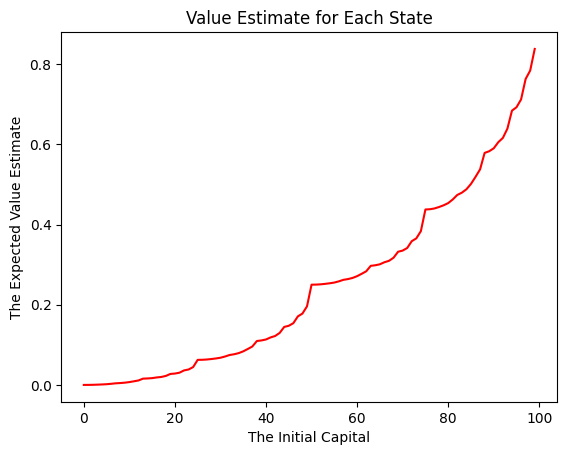

In [18]:
# Plot 
axis = list(range(100)) 
y    = gambler.getValues()[:100]

plt.plot(axis,y, color = 'red')
plt.title('Value Estimate for Each State') 
plt.xlabel('The Initial Capital')
plt.ylabel('The Expected Value Estimate') 



Text(0, 0.5, 'The Best Gamble Estimate')

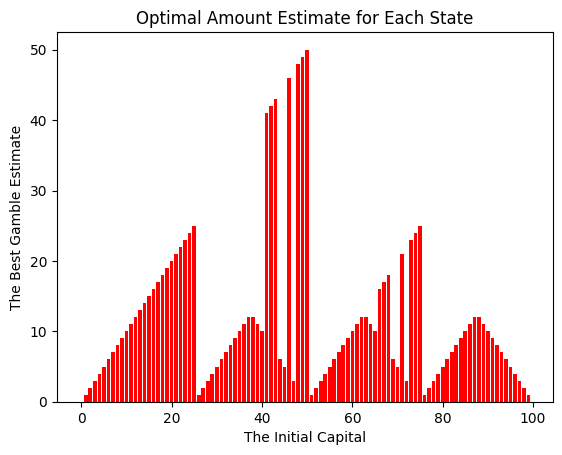

In [19]:
# Plot 
axis = list(range(100)) 
y    = gambler.getPolicy()[:100]

plt.bar(axis,y, color = 'red', align='center')
plt.title('Optimal Amount Estimate for Each State') 
plt.xlabel('The Initial Capital')
plt.ylabel('The Best Gamble Estimate') 



### For P = 0.55

In [20]:
gambler_2.getPolicy() 

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [21]:
gambler_2.getValues()

array([0.        , 0.18181578, 0.33057419, 0.45228568, 0.55186789,
       0.63334432, 0.70000695, 0.7545492 , 0.79917477, 0.8356867 ,
       0.8655602 , 0.89000226, 0.91000039, 0.9263626 , 0.93974995,
       0.95070333, 0.95966526, 0.96699783, 0.97299728, 0.97790599,
       0.98192228, 0.98520839, 0.98789709, 0.99009699, 0.99189696,
       0.99336971, 0.99457473, 0.9955607 , 0.99636744, 0.99702753,
       0.99756764, 0.99800958, 0.9983712 , 0.99866709, 0.9989092 ,
       0.99910732, 0.99926944, 0.99940209, 0.99951065, 0.99959948,
       0.99967218, 0.99973167, 0.99978035, 0.99982019, 0.9998528 ,
       0.99987949, 0.99990133, 0.99991921, 0.99993385, 0.99994583,
       0.99995563, 0.99996366, 0.99997024, 0.99997562, 0.99998002,
       0.99998363, 0.99998659, 0.99998901, 0.99999099, 0.99999261,
       0.99999394, 0.99999503, 0.99999593, 0.99999666, 0.99999726,
       0.99999775, 0.99999815, 0.99999848, 0.99999876, 0.99999898,
       0.99999916, 0.99999931, 0.99999943, 0.99999954, 0.99999

Text(0, 0.5, 'The Expected Value Estimate')

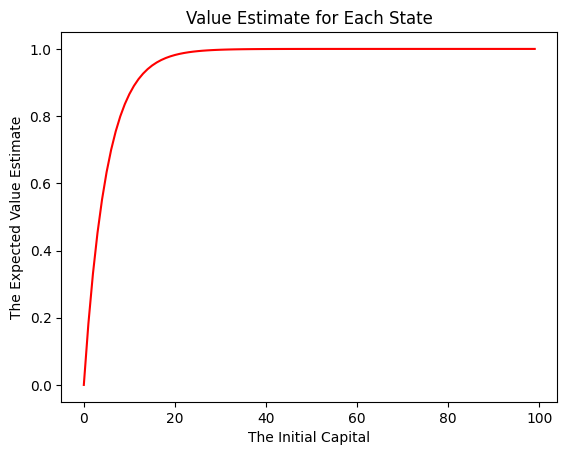

In [22]:
# Plot 
axis = list(range(100)) 
y    = gambler_2.getValues()[:100]

plt.plot(axis,y, color = 'red')
plt.title('Value Estimate for Each State') 
plt.xlabel('The Initial Capital')
plt.ylabel('The Expected Value Estimate') 



Text(0, 0.5, 'The Best Gamble Estimate')

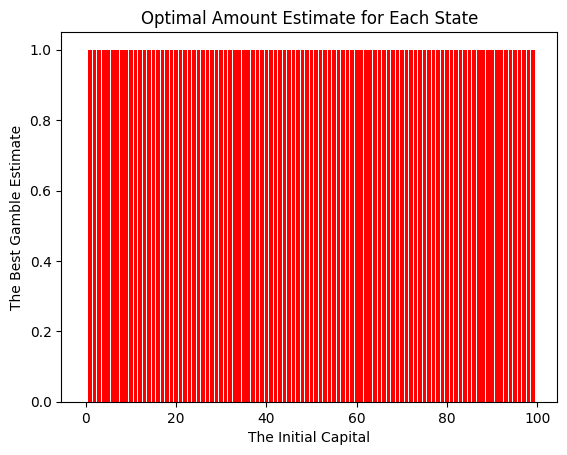

In [23]:
# Plot 
axis = list(range(100)) 
y    = gambler_2.getPolicy()[:100]

plt.bar(axis,y, color = 'red', align='center')
plt.title('Optimal Amount Estimate for Each State') 
plt.xlabel('The Initial Capital')
plt.ylabel('The Best Gamble Estimate') 



### Remarks: 
Interesting result is obtained for the P = 0.55, where it suggests that we should not take very much risk because both heads and tails are equally alike almost. It is interesting in the sense that it aligns exactly to how humans thinks : a 50/50 chance would be too risky to take up if we are gonna lose all we had. 